# Chirped Z-transform (CZT)

CZT allows, in a single step, to propagate to a near or far observation plane. IThe main advantage of CZT is that the region of interest and the sampling numbers can be arbitrarily chosen, endowing CZT with superior flexibility, and produces much faster results (acceleration > x100 with respect to RS algorithm) for focusing and far field diffraction patterns.

As the sampling area and pixels can be reduced to the desired observation area, the storage is also greatly reduced.

CZT algorithm allows to have a XY mask and compute in XY, Z, XZ, XYZ schemes, simply defining the output arrays.


## X Scheme

In [113]:
from diffractio import degrees, mm, um, nm
from diffractio import np, plt, sp

from diffractio.scalar_fields_X import Scalar_field_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_sources_X import Scalar_source_X

from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_fields_Z import Scalar_field_Z

from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

In [114]:
size = 250 * um
xin = np.linspace(-size, size, 4096)
wavelength = 550 * nm
z = 2 * mm


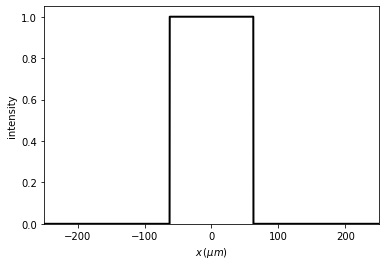

In [115]:
t0 = Scalar_mask_X(xin, wavelength)
t0.slit(x0=0, size=size / 2)
u0 = Scalar_source_X(xin, wavelength)
u0.plane_wave(A=1)

u1 = t0 * u0
u1.draw()


### to just one data

In [116]:
xout = 0.
z = 2 * mm


In [119]:
u2 = u1.CZT(z, xout)
print(u2)

Scalar_field_Z
 - z:  (1024,),   u:  (1024, 1)
 - zmin:       500.00 um,  zmax:      10000.00 um,  Dz:   9.29 um
 - Imin:       0.58,     Imax:      1.80
 - phase_min:  -179.85 deg, phase_max: 178.60 deg
 - wavelength: 0.55 um
 - date:       2024-03-30_23_52_46



### to field_Z

In [122]:
xout = 0
z = np.linspace(.5 * mm, 10 * mm, 256)


In [123]:
%%time
u2 = u1.CZT(z, xout, verbose=True)


CPU times: user 983 ms, sys: 7.99 ms, total: 991 ms
Wall time: 971 ms


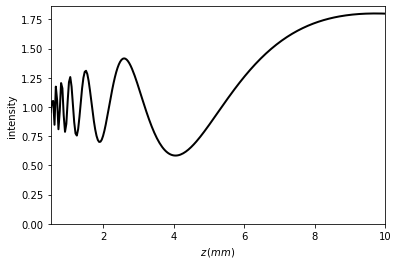

In [124]:
u2.draw(z_scale='mm')


### to field_X

In [125]:
xout = np.linspace(-size, size, 256)
z = 2 * mm


In [126]:
%%time
u2 = u1.CZT(z, xout)


CPU times: user 34.6 ms, sys: 3.08 ms, total: 37.7 ms
Wall time: 35.3 ms


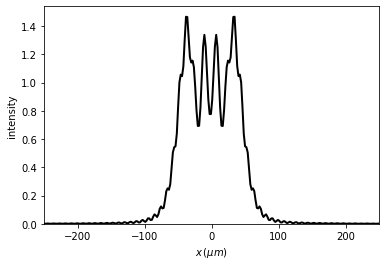

In [127]:
u2.draw()


### to field_XZ

In [128]:
xout = np.linspace(-size / 2, size / 2, 512)
z = np.linspace(1 * mm, 15 * mm, 128)


In [129]:
%%time
u2 = u1.CZT(z, xout, verbose=True)


CPU times: user 997 ms, sys: 11.8 ms, total: 1.01 s
Wall time: 991 ms


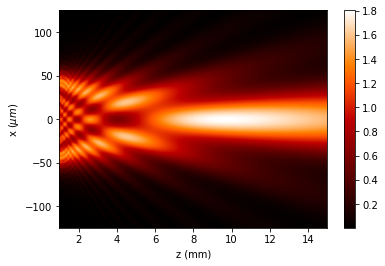

In [130]:
u2.draw(logarithm=0, z_scale='mm')
plt.colorbar()


### to data

In [131]:
xout = 0
yout = 0.
z = .5 * mm


In [132]:
%%time
u2 = u1.CZT(z, xout, yout)
print("{}".format(np.abs(u2)**2))


[0.95645892]
CPU times: user 13.7 ms, sys: 3.36 ms, total: 17 ms
Wall time: 14.6 ms


### to field_X

In [133]:
xout = np.linspace(-size, size, 512)
yout = 0.
z = .5 * mm


CPU times: user 72.9 ms, sys: 147 µs, total: 73 ms
Wall time: 69.6 ms


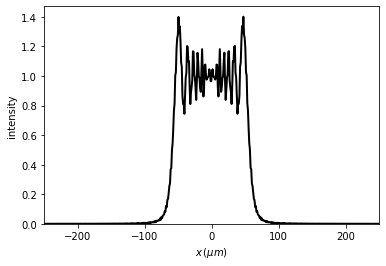

In [134]:
%%time
u2 = u1.CZT(z, xout, yout)
u2.draw()


### to field_Z

The Z field is computed with a for loop, thus it is a bit slower.

In [97]:
xout = -1.
yout = 0.
z = np.linspace(0.25 * mm, 1 * mm, 64)


CPU times: user 272 ms, sys: 0 ns, total: 272 ms
Wall time: 272 ms


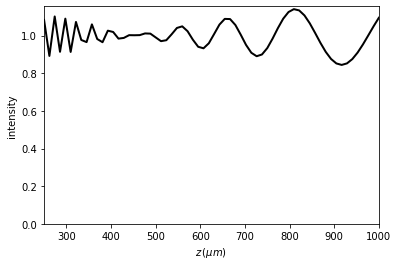

In [98]:
%%time
u2 = u1.CZT(z, xout, yout)
u2.draw()


### to field_XZ

In [99]:
xout = np.linspace(-100*um, 100*um, 256)
yout = 0.
z = np.linspace(0.25 * mm, 1 * mm, 128)


CPU times: user 972 ms, sys: 0 ns, total: 972 ms
Wall time: 971 ms


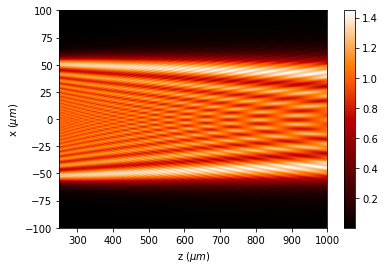

In [100]:
%%time
u2 = u1.CZT(z, xout, yout)
u2.draw()
plt.colorbar()


## CZT for reducing the output size

Chirped z-Transform algorithm is specially indicated for cases where the output field is much smaller than the input field, as you can choose the position and sampling of the field. An important example for this is the focusing of a lens.

### X scheme

In [137]:
size = 3 * mm
xin = np.linspace(-size, size, 2048)
wavelength = 550 * nm
focal = 250 * mm


In [138]:
t0 = Scalar_mask_X(xin, wavelength)
t0.lens(x0=0, focal=focal)

u0 = Scalar_source_X(xin, wavelength)
u0.plane_wave(A=1)

u1 = t0 * u0


In [139]:
xout = 0.
z = np.linspace(focal - 30 * mm, focal + 30 * mm, 128)


CPU times: user 333 ms, sys: 2.84 ms, total: 336 ms
Wall time: 326 ms


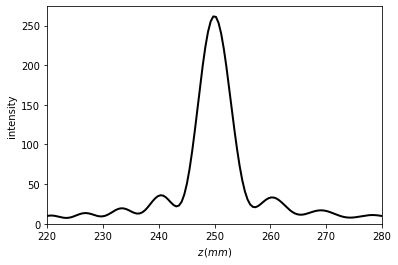

In [140]:
%%time
u2 = u1.CZT(z, xout, verbose=True)
u2.draw(z_scale='mm')


In [141]:
xout = np.linspace(-150 * um, 150 * um, 256)
z = focal

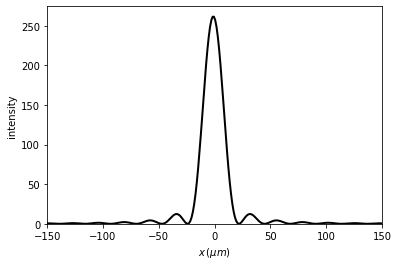

In [142]:
u2 = u1.CZT(focal, xout)
u2.draw()

In [143]:
xout = np.linspace(-150 * um, 150 * um, 256)
z = np.linspace(focal - 20 * mm, focal + 20 * mm, 128)

CPU times: user 604 ms, sys: 948 µs, total: 605 ms
Wall time: 584 ms


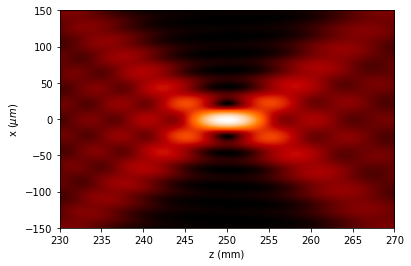

In [147]:
%%time
u2 = u1.CZT(z, xout, verbose=True)
u2.draw(logarithm=1e-1, z_scale='mm')


### XY scheme

In [150]:
size = 2 * mm
xin = np.linspace(-size, size, 256)
yin = np.linspace(-size, size, 512)
wavelength = 550 * nm
focal = 500 * mm


In [151]:
t0 = Scalar_mask_XY(xin, yin, wavelength)
t0.lens(r0=(0, 0), focal=focal, radius=0)
t0.pupil()

u0 = Scalar_source_XY(xin, yin, wavelength)
u0.plane_wave(A=1)

u1 = t0 * u0


In [152]:
xout = np.linspace(-250 * um, 250 * um, 100)
yout = np.linspace(-250 * um, 250 * um, 128)
z = focal


num x, num y, num z = 100, 128, 1


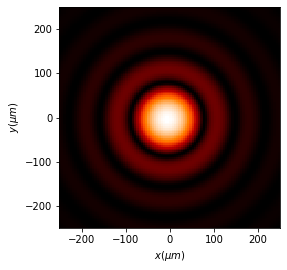

In [153]:
u2 = u1.CZT(z, xout, yout, verbose=True)
u2.draw(logarithm=1e-1)
